In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
def task(data, task_num, dataset_name):
    '''
    绘制三个折线图（ACC、FWT、BWT），展示不同方法在多任务序列上的ACC、FWT和BWT的变化趋势。
    
    参数：
    data: 字典，第一层键为方法名称；第二层键为指标类型（"ACC"、"FWT"、"BWT"）；第三层为数值列表，元素个数对应任务的指标值，长度需与任务数量一致。
    task_num: 整数，任务的总数量，决定 X 轴的刻度范围。
    dataset_name：数据集名称，用于图片保存路径的命名。

    配色：
    sns.set_theme(style="whitegrid", palette="muted")
    '''
  
    acc_data = {
        "Task": list(range(task_num)),
        "Supsup": data["Supsup"]["ACC"],
        "Finetune": data["Finetune"]["ACC"],
        "HLOP": data["HLOP"]["ACC"],
        "Single": data["Single"]["ACC"],
        "Ours": data["Ours"]["ACC"]
    }
    acc_df = pd.DataFrame(acc_data)

    fwt_bwt_data = {
        "Task": list(range(task_num)),
        "Supsup_FWT": data["Supsup"]["FWT"],
        "HLOP_FWT": data["HLOP"]["FWT"],
        "Ours_FWT": data["Ours"]["FWT"],
        "Finetune_FWT": data["Finetune"]["FWT"],
        "Supsup_BWT": data["Supsup"]["BWT"],
        "HLOP_BWT": data["HLOP"]["BWT"],
        "Ours_BWT": data["Ours"]["BWT"],
        "Finetune_BWT": data["Finetune"]["BWT"]
    }
    fwt_bwt_df = pd.DataFrame(fwt_bwt_data)

    sns.set_theme(style="whitegrid", palette="muted")
    sns.set_context(rc={"lines.linewidth": 2.5, "markersize": 10})
    
    # 创建ACC图表
    plt.figure(figsize=(5, 3), constrained_layout=True)
    sns.lineplot(x="Task", y="Ours", data=acc_df, label="Ours", marker='o', markersize=7)
    sns.lineplot(x="Task", y="Supsup", data=acc_df, label="Supsup", marker='o', markersize=7)
    sns.lineplot(x="Task", y="HLOP", data=acc_df, label="HLOP", marker='o', markersize=7)
    sns.lineplot(x="Task", y="Finetune", data=acc_df, label="Finetune", marker='o', markersize=7)
    sns.lineplot(x="Task", y="Single", data=acc_df, label="Single", marker='o', markersize=7)
    plt.xlabel('Task')
    plt.ylabel('Accuracy')
    plt.xticks(range(task_num), range(1, task_num+1))
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.grid(axis='x')
    plt.legend(framealpha=0.5)
    # plt.savefig(f'img/acc_{dataset_name}_{task_num}.pdf', bbox_inches='tight')
    plt.show()

    # 创建FWT图表
    plt.figure(figsize=(5, 3), constrained_layout=True)
    sns.lineplot(x="Task", y="Ours_FWT", data=fwt_bwt_df, label="Ours", marker='o', markersize=7)
    sns.lineplot(x="Task", y="Supsup_FWT", data=fwt_bwt_df, label="Supsup", marker='o', markersize=7)
    sns.lineplot(x="Task", y="HLOP_FWT", data=fwt_bwt_df, label="HLOP", marker='o', markersize=7)
    sns.lineplot(x="Task", y="Finetune_FWT", data=fwt_bwt_df, label="Finetune", marker='o', markersize=7)
    plt.xlabel('Task')
    plt.ylabel('FWT(%)')
    plt.xticks(range(task_num), range(1, task_num+1))
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.legend(framealpha=0.5)
    plt.grid(axis='x')
    # plt.savefig(f'img/fwt_{dataset_name}_{task_num}.pdf', bbox_inches='tight')
    plt.show()

    # 创建BWT图表
    plt.figure(figsize=(5, 3), constrained_layout=True)
    sns.lineplot(x="Task", y="Ours_BWT", data=fwt_bwt_df, label="Ours", marker='s', markersize=7)
    sns.lineplot(x="Task", y="Supsup_BWT", data=fwt_bwt_df, label="Supsup", marker='s', markersize=3)
    sns.lineplot(x="Task", y="HLOP_BWT", data=fwt_bwt_df, label="HLOP", marker='s', markersize=7)
    sns.lineplot(x="Task", y="Finetune_BWT", data=fwt_bwt_df, label="Finetune", marker='s', markersize=7)
    plt.xlabel('Task')
    plt.ylabel('BWT(%)')
    plt.xticks(range(task_num), range(1, task_num+1))
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.legend(framealpha=0.5)
    plt.grid(axis='x')
    plt.savefig(f'bwt_{dataset_name}_{task_num}.pdf', bbox_inches='tight')
    plt.show()

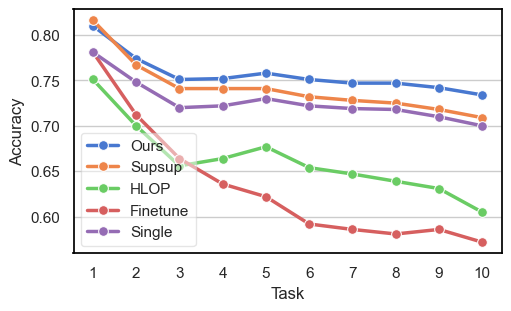

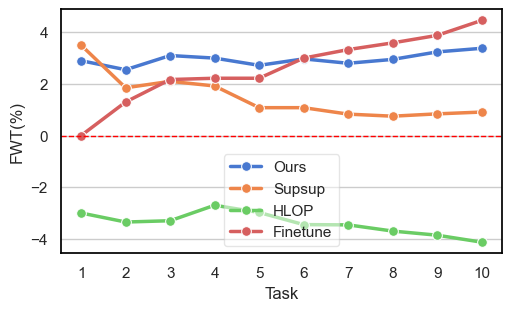

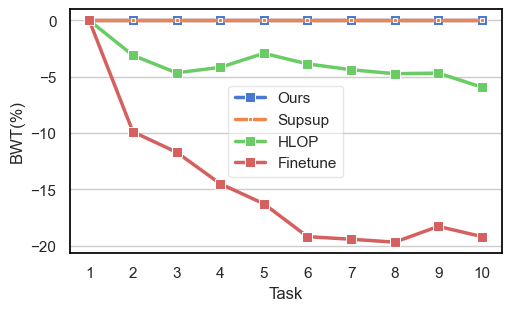

In [6]:
#示例一
# Cifar-100-10
data = {"Supsup": {}, "Finetune": {}, "Single": {}, "Ours": {}, "HLOP": {}}
data["Supsup"]["FWT"] = [3.5,1.85,2.1,1.92,1.08,1.08,0.83,0.75,0.84,0.91]
data["Ours"]["FWT"] = [2.9,2.55,3.1,3,2.72,2.97,2.8,2.95,3.24,3.38]
data["Finetune"]["FWT"] = [0.00,1.30,2.17,2.22,2.22,3.00,3.33,3.59,3.88,4.46]
data["HLOP"]["FWT"] = [-3.0,-3.35,-3.3,-2.7,-2.98,-3.45,-3.46,-3.7,-3.86,-4.13]

data["Supsup"]["BWT"] = [0] * 10
data["Ours"]["BWT"] = [0] * 10
data["Finetune"]["BWT"] = [0,-9.89,-11.7,-14.5,-16.28,-19.2,-19.43,-19.69,-18.29,-19.2]
data["HLOP"]["BWT"] = [0.0,-3.1,-4.65,-4.17,-2.92,-3.86,-4.38,-4.73,-4.68,-5.93]

data["Single"]["ACC"] =  [0.781,0.748,0.720,0.722,0.730,0.722,0.719,0.718,0.710,0.700]
data["Supsup"]["ACC"] = [0.816,0.767,0.741,0.741,0.741,0.732,0.728,0.725,0.718,0.709]
data["Ours"]["ACC"] =   [0.810,0.774,0.751,0.752,0.758,0.751,0.747,0.747,0.742,0.734]
data["Finetune"]["ACC"]=[0.781,0.712,0.664,0.636,0.622,0.592,0.586,0.581,0.586,0.572]
data["HLOP"]["ACC"]  =  [0.751,0.700,0.656,0.664,0.677,0.654,0.647,0.639,0.631,0.605]

data_10=data

task(data_10, 10, "cifar100")

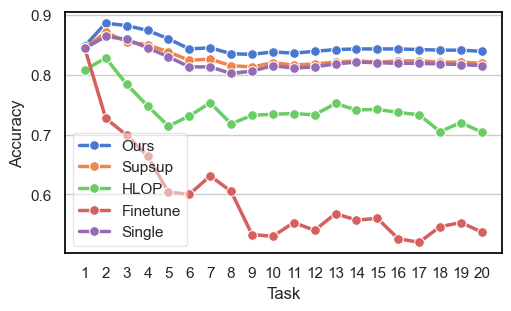

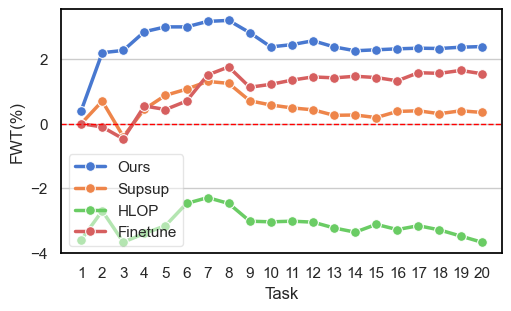

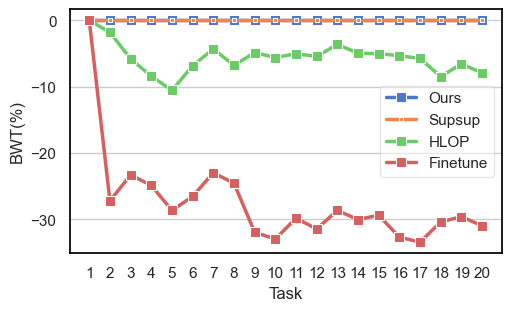

In [7]:
# 示例二
# Cifar-100-20
data = {"Supsup": {}, "Finetune": {}, "Single": {}, "Ours": {}, "HLOP": {}}
data["Supsup"]["FWT"] = [0.0,0.7,-0.4,0.45,0.88,1.07,1.31,1.25,0.71,0.58,
                         0.49,0.43,0.26,0.27,0.19,0.38,0.4,0.31,0.40,0.35]
data["Ours"]["FWT"] = [0.4,2.2,2.27,2.85,3,3,3.17,3.2,2.82,2.38,
                       2.45,2.57,2.38,2.26,2.29,2.32,2.34,2.33,2.37,2.39]
data["Finetune"]["FWT"] = [0,-0.10,-0.47,0.55,0.44,0.70,1.51,1.76,1.13,1.22,
                       1.35,1.45,1.42,1.47,1.43,1.33,1.58,1.56,1.65,1.55]
data["HLOP"]["FWT"] = [-3.6,-2.7,-3.67,-3.4,-3.16,-2.47,-2.29,-2.47,-3.02,-3.04,
                       -3.02,-3.05,-3.23,-3.36,-3.12,-3.28,-3.16,-3.29,-3.48,-3.67]

data["Supsup"]["BWT"] = [0] * 20
data["Ours"]["BWT"] = [0] * 20
data["Finetune"]["BWT"] = [0.00,-27.20,-23.30,-24.87,-28.65,-26.53,-22.97,-24.54,-31.93,-32.96,
                           -29.82,-31.44,-28.65,-30.02,-29.37,-32.67,-33.43,-30.40,-29.58,-30.96]
data["HLOP"]["BWT"] = [0.0,-1.8,-5.8,-8.4,-10.55,-6.84,-4.3,-6.77,-4.85,-5.6,
                       -5.02,-5.42,-3.62,-4.94,-5.01,-5.32,-5.73,-8.47,-6.56,-7.91]

data["Supsup"]["ACC"] = [0.844,0.871,0.855,0.850,0.838,0.824,0.826,0.815,0.813,0.820,
                         0.816,0.818,0.821,0.823,0.821,0.823,0.823,0.821,0.821,0.819]
data["Single"]["ACC"] = [0.844,0.864,0.859,0.845,0.830,0.813,0.813,0.802,0.806,0.815,
                         0.811,0.813,0.818,0.821,0.820,0.819,0.819,0.818,0.817,0.815]
data["Ours"]["ACC"] =   [0.848,0.886,0.882,0.874,0.860,0.843,0.845,0.835,0.834,0.838,
                         0.836,0.839,0.842,0.843,0.843,0.843,0.842,0.841,0.841,0.839]
data["Finetune"]["ACC"]=[0.844,0.727,0.699,0.664,0.604,0.600,0.631,0.605,0.533,0.530,
                         0.553,0.540,0.568,0.557,0.560,0.526,0.520,0.546,0.553,0.537]
data["HLOP"]["ACC"]  =  [0.808,0.828,0.784,0.748,0.714,0.731,0.753,0.718,0.732,0.734,
                         0.735,0.733,0.752,0.741,0.742,0.737,0.733,0.705,0.720,0.704]
data_20=data
task(data_20, 20, "cifar100")